### partition by 

* Doesn't reduce the rows as compared to group by
* divide the dataframe into partitions and calculate partitions

In [ ]:
select first_name, last_name, gender, salary, 
        count(gender) over (
                partition by gender 
        ) as total_employee_per_gender
from employee_demographics ed
inner join employee_salary es 
on ed.employee_id = es.employee_id

### Common table expression (CTE) 

* acts like subquery
* available only within query
* also know as WITH query
* runs each time




In [ ]:
with cte_employee as (

	select first_name, last_name, gender, salary, 
			count(gender) over (
					partition by gender 
			) as total_employee_per_gender,
			
			avg(salary) over (
					partition by gender 
			) as avg_salary_per_gender
	from employee_demographics ed
	inner join employee_salary es 
	on ed.employee_id = es.employee_id
	where salary > 45000
)
select *
from cte_employee

### temp table

* lot of time used in stored procedure
* reduce processing power for repetative task
* temperoray storage of data for further calculation to part of the tabel

In [ ]:
drop table if exists employee2;

# create temp table
create temp table employee2(
	
	job_title varchar(50),
	employee_per_job int,
	avg_age int,
	avg_salary int

);



# insert values into temp from multiple table
insert into employee2 
select es.job_title, count(ed.employee_id) as employee_per_job, 
		avg(age) as avg_age, avg(salary) as avg_salary
from employee_demographics ed 
inner join employee_salary es 
on ed.employee_id = es.employee_id
group by es.job_title; 



# query temp table
select *
from employee2


###  String Functions - TRIM, LTRIM, RTRIM, Replace, Substring, Upper, Lower

In [ ]:
CREATE TABLE EmployeeErrors (
EmployeeID varchar(50)
,FirstName varchar(50)
,LastName varchar(50)
)



Insert into EmployeeErrors Values 
('1001  ', 'Jimbo', 'Halbert')
,('  1002', 'Pamela', 'Beasely')
,('1005', 'TOby', 'Flenderson - Fired')

In [ ]:
# trim left and right whitespace 
select employeeid, trim(employeeid) 
from EmployeeErrors;

# trim the left part
select employeeid, ltrim(employeeid) 
from EmployeeErrors;

# trim the right part
select employeeid, rtrim(employeeid) 
from EmployeeErrors;

In [ ]:
# replace it with string we need
select lastname, replace(lastname, '- Fired', '')
from employeeerrors 

### Fuzzy matching -- doesn't mean perfect matching and works all time, but useful for approximate matching

* Gender
* Last name
* age
* Date of Birth


Substring helps to do it here


In [ ]:
## select only first 3 char from the first_name

select ed.first_name,  ee.firstname, substring(ed.first_name, 1, 3), substring(ee.firstname, 1, 3)
from employee_demographics ed 
join employeeerrors ee
on substring(ed.first_name, 1, 3) = substring(ee.firstname, 1, 3)

## Upper and Lower

* make all character upper -- upper()
* make all character lower -- lower()

In [ ]:
select firstname, upper(firstname)
from employeeerrors 


select lastname, lower(lastname)
from employeeerrors 

### stored procedures

* group of sql statements created and stored in database
* reduce network traffic and increase performance
* modifing it effect whole user base


In [ ]:
CREATE OR REPLACE FUNCTION test()
RETURNS TABLE (
    employee_id int
)
LANGUAGE plpgsql
AS $$
BEGIN
    RETURN QUERY SELECT ed.employee_id  FROM employee_demographics ed;
END;
$$;

# call the function
select * from test();

In [ ]:
# pass parameter to the function 

CREATE OR REPLACE FUNCTION test2(p_job_title varchar(100))
RETURNS TABLE (
    employee_id int,
    job_title varchar(100)
)
LANGUAGE plpgsql
AS $$
BEGIN
    RETURN QUERY SELECT es.employee_id, es.job_title  
   				 FROM employee_salary es
   				 where es.job_title = p_job_title;
END;
$$;

select * 
from test2('Salesman');


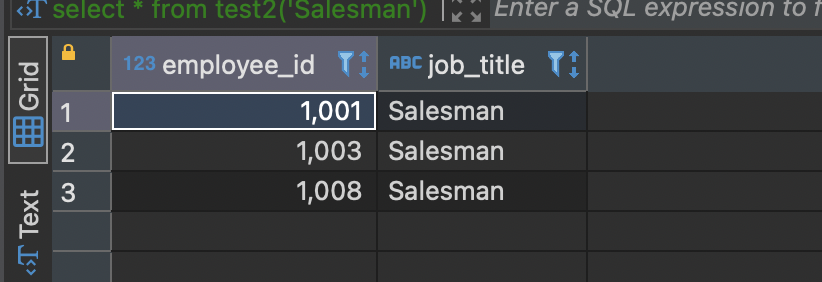

### subqueries

* also known as inner queries, nested queries
* use it in select, from and where statement as well
* also sometimes insert statements


In [ ]:
## subquery in select statement

select employee_id, salary, (
		select avg(salary) 
		from employee_salary es2 
	) as all_avg_salary
from employee_salary es 


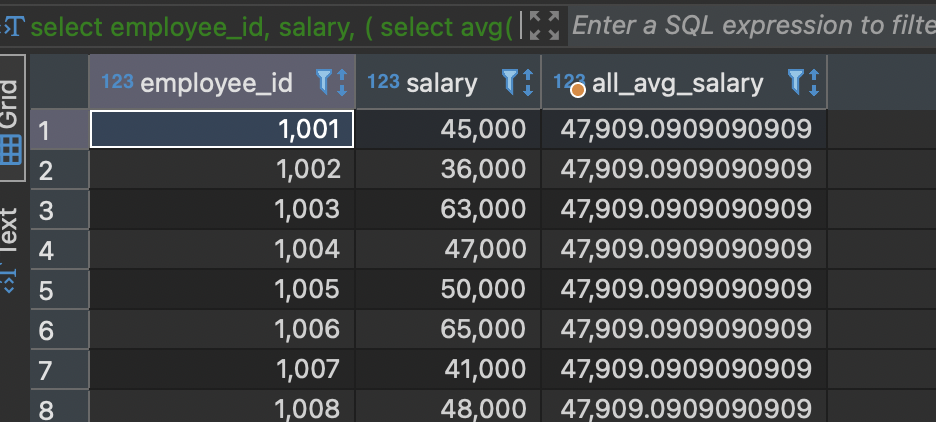


# group by clause
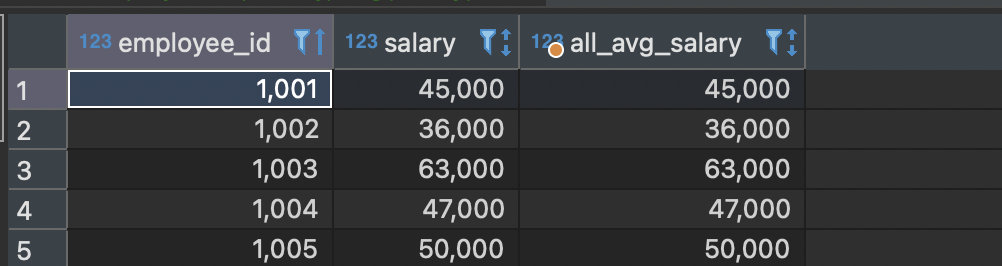

In [ ]:
# we can achieve the same result using partition by window function

select employee_id, salary, avg(salary) over() as all_avg_salary
from employee_salary es 


## we can't achieve this using group by clause

select employee_id, salary, avg(salary) as  all_avg_salary
from employee_salary es
group by employee_id, salary

# subquery in from statement

* prefer to use CTE or temp table in this kind of situation

In [ ]:
select a.employee_id, a.all_avg_salary
from (
		select employee_id, salary, avg(salary) over() as  all_avg_salary
		from employee_salary es
	) as a

# subquery in where clause

* we can use it when we don't need column of another table
* we just need some info from other table to filter out the result

In [ ]:
select employee_id, job_title, salary 
from employee_salary es 
where employee_id in (
		select employee_id 
		from employee_demographics ed 
		where age > 30 

)